In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [2]:
train = pd.read_csv('customer_churn_train.csv')
test = pd.read_csv('customer_churn_test.csv')

In [3]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [4]:
train.churn.value_counts(normalize=True)
#Imbalanced dataset

no     0.859294
yes    0.140706
Name: churn, dtype: float64

In [5]:
print("Customers churned = ",(train["churn"]=='yes').sum())
print("Customers not churned = ",(train["churn"]=='no').sum())

Customers churned =  598
Customers not churned =  3652


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [7]:
train.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [8]:
train['area_code'].unique()

array(['area_code_415', 'area_code_408', 'area_code_510'], dtype=object)

In [9]:
train[train["state"]=='OH']["churn"].value_counts(normalize=True).yes*100

12.631578947368421

In [10]:
numerical= train.select_dtypes(include = 'number').columns

categorical = train.select_dtypes(include = 'object').columns

In [11]:
for i in numerical:
    if (train[i].dtype=='int64'):
        train[i]=train[i].astype(float)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   float64
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   float64
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   float64
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   float64
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

## Encoding columns

In [13]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
train.churn=le.fit_transform(train.churn)

In [14]:
train['churn'].head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     0
10    0
11    0
12    1
13    0
14    0
15    0
16    0
17    1
18    0
19    0
Name: churn, dtype: int32

In [15]:
numerical= train.select_dtypes(include = 'number').columns

categorical = train.select_dtypes(include = 'object').columns

print(f'Numerical Columns:  {train[numerical].columns}')
print('\n')
print(f'Categorical Columns: {train[categorical].columns}')

Numerical Columns:  Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')


Categorical Columns: Index(['state', 'area_code', 'international_plan', 'voice_mail_plan'], dtype='object')


In [16]:
train[numerical].describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059,0.140706
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434,0.347759
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000,0.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


<AxesSubplot:>

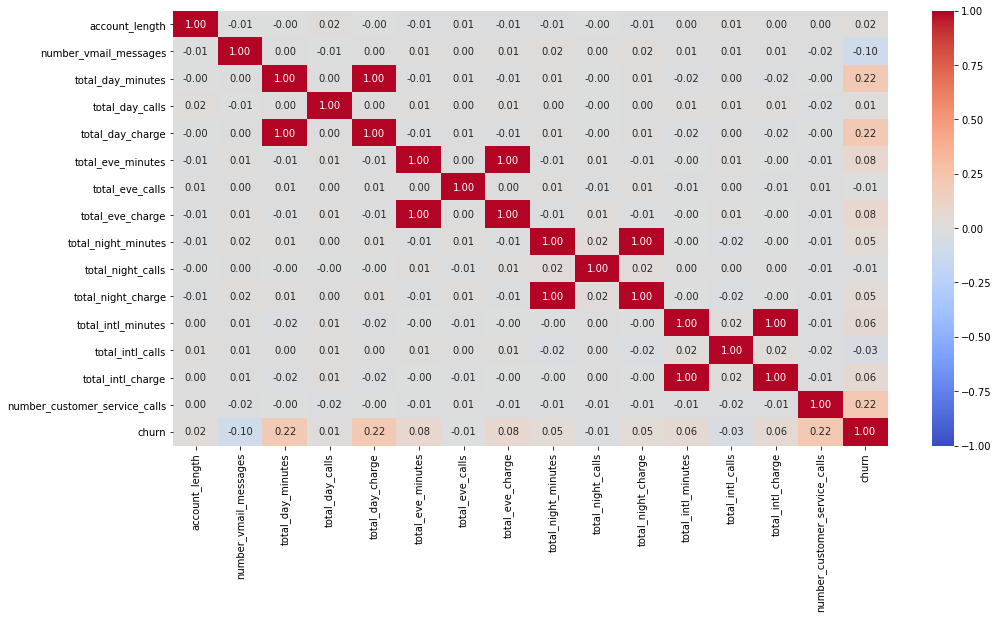

In [17]:
plt.figure(figsize=(16, 8))
sns.heatmap (train[numerical].corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm')

We can see in heatmap that we have some multicollinerity.
We need to drop one of each highly correleated column pairs.

In [18]:
drop_col = ['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge']
train = train.drop(drop_col, axis=1)
train.shape

(4250, 16)

In [19]:
numerical= train.select_dtypes(include = 'number').columns
numerical

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_eve_minutes', 'total_eve_calls',
       'total_night_minutes', 'total_night_calls', 'total_intl_minutes',
       'total_intl_calls', 'number_customer_service_calls', 'churn'],
      dtype='object')

<AxesSubplot:>

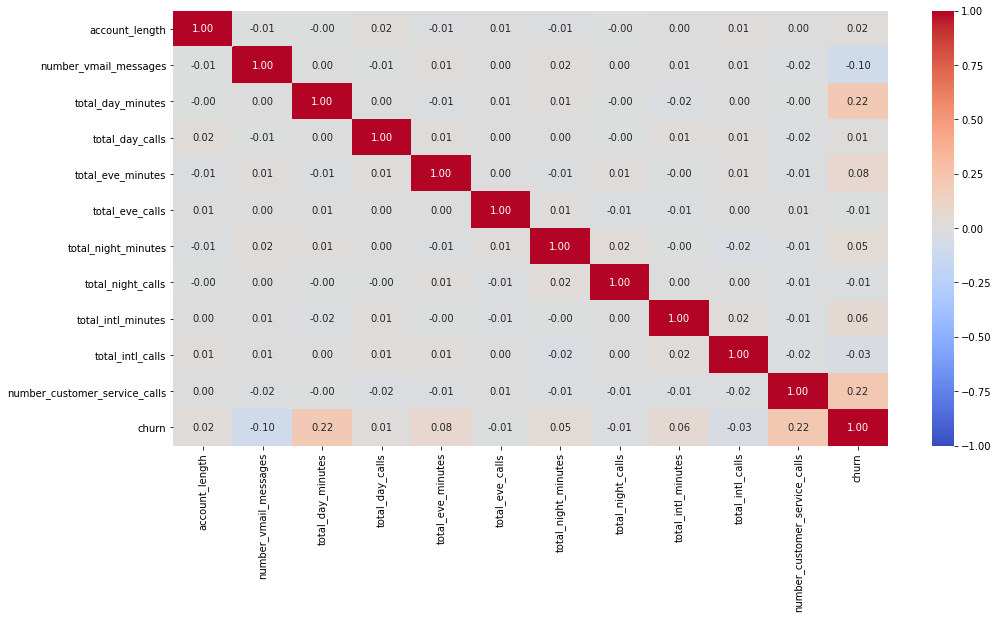

In [20]:
plt.figure(figsize=(16, 8))
sns.heatmap (train[numerical].corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm')

We got rid of multicollinear columns.
total_day_minutes has the highest correleation with churn.
Overall, there is low correleations among features.

## Categorical Features

In [21]:
train[categorical].nunique()

state                 51
area_code              3
international_plan     2
voice_mail_plan        2
dtype: int64

Great news! We do not have a high cardinality or zero variance issues.

In [22]:
for column in train[categorical]:
    print(f"{column}: {train[column].unique()}")

state: ['OH' 'NJ' 'OK' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY' 'ID' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'SC' 'WY' 'HI' 'NH' 'AK' 'GA' 'MD' 'AR' 'WI' 'OR'
 'MI' 'DE' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'VT' 'KY' 'ME'
 'MS' 'AL' 'NE' 'KS' 'TN' 'IL' 'PA' 'CT' 'ND']
area_code: ['area_code_415' 'area_code_408' 'area_code_510']
international_plan: ['no' 'yes']
voice_mail_plan: ['yes' 'no']


In [23]:
for i in train["state"].unique():
    print(f'A customer from state of {i} has a probability of {round(train[train["state"]==i]["churn"].mean()*100,2)} % churn.')

A customer from state of OH has a probability of 12.63 % churn.
A customer from state of NJ has a probability of 27.08 % churn.
A customer from state of OK has a probability of 20.51 % churn.
A customer from state of MA has a probability of 15.73 % churn.
A customer from state of MO has a probability of 12.5 % churn.
A customer from state of LA has a probability of 10.14 % churn.
A customer from state of WV has a probability of 13.67 % churn.
A customer from state of IN has a probability of 15.66 % churn.
A customer from state of RI has a probability of 6.9 % churn.
A customer from state of IA has a probability of 11.29 % churn.
A customer from state of MT has a probability of 21.25 % churn.
A customer from state of NY has a probability of 16.67 % churn.
A customer from state of ID has a probability of 11.32 % churn.
A customer from state of VA has a probability of 5.0 % churn.
A customer from state of TX has a probability of 19.39 % churn.
A customer from state of FL has a probability

In [24]:
fig = px.histogram(data_frame=train, x="state", color="churn", width=1200, height=400)
fig.show()

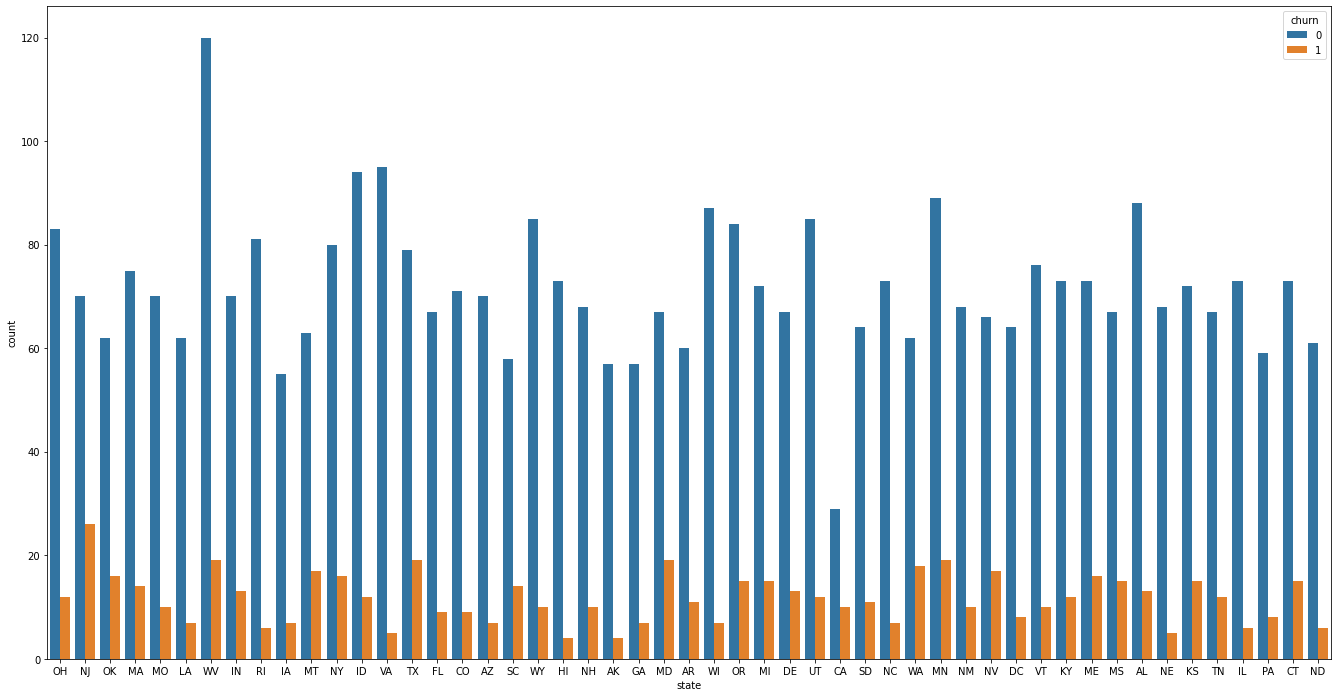

In [25]:
fig, ax = plt.subplots(figsize=(23, 12))
sns.countplot(x="state",hue="churn",data=train)
plt.show()

While CA (California) has the highest rate of churn, VA (Virginia) has the lowest churn rate.
Overall churn rates among states range from 5 percent to 25 percent.

### area_code vs. churn

In [26]:
area_code: ['area_code_415' 'area_code_408' 'area_code_510']
    
print(f'A customer with area_code_415 has a probability of {round(train[train["area_code"]=="area_code_415"]["churn"].mean()*100,2)} % churn.')
print()
print(f'A customer with area_code_408 has a probability of {round(train[train["area_code"]=="area_code_408"]["churn"].mean()*100,2)} % churn.')
print()
print(f'A customer with area_code_510 has a probability of {round(train[train["area_code"]=="area_code_510"]["churn"].mean()*100,2)} % churn.')


A customer with area_code_415 has a probability of 13.61 % churn.

A customer with area_code_408 has a probability of 14.0 % churn.

A customer with area_code_510 has a probability of 15.06 % churn.


In [27]:
fig = px.histogram(data_frame=train, x="area_code", color="churn", width=420, height=420)
fig.show()

It seems that there is not much difference among area_codes on churn rate.
We may drop it later.

#### international_plan vs. churn

In [28]:
print(f'A customer with an international plan has a probability of {round(train[train["international_plan"]=="yes"]["churn"].mean()*100,2)} % churn.')
print()
print(f'A customer wwithout an international plan has a probability of {round(train[train["international_plan"]=="no"]["churn"].mean()*100,2)} % churn.')

A customer with an international plan has a probability of 42.17 % churn.

A customer wwithout an international plan has a probability of 11.18 % churn.


In [29]:
fig = px.histogram(data_frame=train, x="international_plan", color="churn", width=420, height=420)
fig.show()

Customers with an international plan is almost 4 times more likely to churn than those without international plan.

#### voice_mail_plan vs. churn

In [30]:
print(f'A customer with a voice mail plan has a probability of {round(train[train["voice_mail_plan"]=="yes"]["churn"].mean()*100,2)} % churn.')
print()
print(f'A customer wwithout a vocie mail plan has a probability of {round(train[train["voice_mail_plan"]=="no"]["churn"].mean()*100,2)} % churn.')

A customer with a voice mail plan has a probability of 7.37 % churn.

A customer wwithout a vocie mail plan has a probability of 16.44 % churn.


In [31]:
fig = px.histogram(data_frame=train, x="voice_mail_plan", color="churn", width=420, height=420)
fig.show()

Customers without a voice mail plan is almost 2.5 times more likely to churn than those with voice mail plan.

## Over Sampling

In [93]:
count_class_0, count_class_1 = train.churn.value_counts()
# print(count_class_0,count_class_1)
# Divide by class
df_class_0 = train[train['churn'] == 0]
df_class_1 = train[train['churn'] == 1]

Random over-sampling:
0    3652
1    3652
Name: churn, dtype: int64


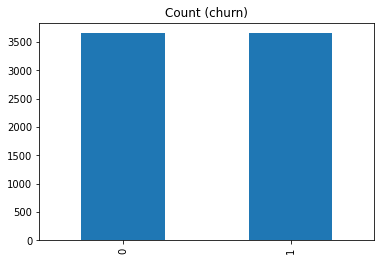

In [94]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.churn.value_counts())

df_test_over.churn.value_counts().plot(kind='bar', title='Count (churn)');

In [95]:
df_test_over.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
0,OH,107.0,area_code_415,no,yes,26.0,161.6,123.0,195.5,103.0,254.4,103.0,13.7,3.0,1.0,0
1,NJ,137.0,area_code_415,no,no,0.0,243.4,114.0,121.2,110.0,162.6,104.0,12.2,5.0,0.0,0
2,OH,84.0,area_code_408,yes,no,0.0,299.4,71.0,61.9,88.0,196.9,89.0,6.6,7.0,2.0,0
3,OK,75.0,area_code_415,yes,no,0.0,166.7,113.0,148.3,122.0,186.9,121.0,10.1,3.0,3.0,0
4,MA,121.0,area_code_510,no,yes,24.0,218.2,88.0,348.5,108.0,212.6,118.0,7.5,7.0,3.0,0


In [96]:
# le = preprocessing.LabelEncoder()
# df_test_over['area_code']=le.fit_transform(df_test_over['area_code'])
# df_test_over['international_plan']=le.fit_transform(df_test_over['international_plan'])
# df_test_over['voice_mail_plan']=le.fit_transform(df_test_over['voice_mail_plan'])
# df_test_over=df_test_over.drop(['state'],axis=1)
df_test_over=pd.get_dummies(df_test_over)
df_test_over.head(10)


,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,...,state_WI,state_WV,state_WY,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,107.0,26.0,161.6,123.0,195.5,103.0,254.4,103.0,13.7,3.0,...,0,0,0,0,1,0,1,0,0,1
1,137.0,0.0,243.4,114.0,121.2,110.0,162.6,104.0,12.2,5.0,...,0,0,0,0,1,0,1,0,1,0
2,84.0,0.0,299.4,71.0,61.9,88.0,196.9,89.0,6.6,7.0,...,0,0,0,1,0,0,0,1,1,0
3,75.0,0.0,166.7,113.0,148.3,122.0,186.9,121.0,10.1,3.0,...,0,0,0,0,1,0,0,1,1,0
4,121.0,24.0,218.2,88.0,348.5,108.0,212.6,118.0,7.5,7.0,...,0,0,0,0,0,1,1,0,0,1
5,147.0,0.0,157.0,79.0,103.1,94.0,211.8,96.0,7.1,6.0,...,0,0,0,0,1,0,0,1,1,0
6,117.0,0.0,184.5,97.0,351.6,80.0,215.8,90.0,8.7,4.0,...,0,0,0,1,0,0,1,0,1,0
7,141.0,37.0,258.6,84.0,222.0,111.0,326.4,97.0,11.2,5.0,...,0,1,0,0,1,0,0,1,0,1
9,74.0,0.0,187.7,127.0,163.4,148.0,196.0,94.0,9.1,5.0,...,0,0,0,0,1,0,1,0,1,0
10,168.0,0.0,128.8,96.0,104.9,71.0,141.1,128.0,11.2,2.0,...,0,0,0,1,0,0,1,0,1,0


In [97]:
from sklearn.model_selection import train_test_split

X=df_test_over.drop(['churn'],axis=1)
Y=df_test_over['churn']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [98]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=3000)
logisticRegr.fit(x_train, y_train)


LogisticRegression(max_iter=3000)

In [99]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.787513691128149


## XgBoost

In [100]:
from sklearn.metrics import accuracy_score,classification_report, recall_score,confusion_matrix, roc_auc_score, precision_score, f1_score, roc_curve, auc, plot_confusion_matrix,plot_roc_curve


from xgboost import XGBClassifier



from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier, plot_importance

In [102]:
accuracy= []
recall =[]
roc_auc= []
precision = []


df = pd.read_csv("customer_churn_train.csv")
df1 = df.copy()
le = preprocessing.LabelEncoder()
df1['churn']=le.fit_transform(df1['churn'])

#Since XGBoost does not handle categorical values itself, we use get_dummies to convert categorical variables into numeric variables.
df1= pd.get_dummies(df1)
X= df1.drop('churn', axis=1)
y= df1['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgbc_5 = XGBClassifier(random_state=0)

xgbc_5.fit(X_train, y_train)
y_pred = xgbc_5.predict(X_test)

accuracy.append(round(accuracy_score(y_test, y_pred),4))
recall.append(round(recall_score(y_test, y_pred),4))
roc_auc.append(round(roc_auc_score(y_test, y_pred),4))
precision.append(round(precision_score(y_test, y_pred),4))

model_names = ['XGBoost_adjusted_weight_5']
result_df5 = pd.DataFrame({'Accuracy':accuracy,'Recall':recall, 'Roc_Auc':roc_auc, 'Precision':precision}, index=model_names)
result_df5

C:\Users\zubai\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:27:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Accuracy,Recall,Roc_Auc,Precision
XGBoost_adjusted_weight_5,0.9522,0.7744,0.8793,0.8988
